# Code for Figure 4 c and f

In [2]:
pip install matplotlib-venn

Note: you may need to restart the kernel to use updated packages.


In [8]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt 
from matplotlib_venn import venn2, venn3 # pip install matplotlib-venn
from scipy import stats
import matplotlib.ticker as ticker

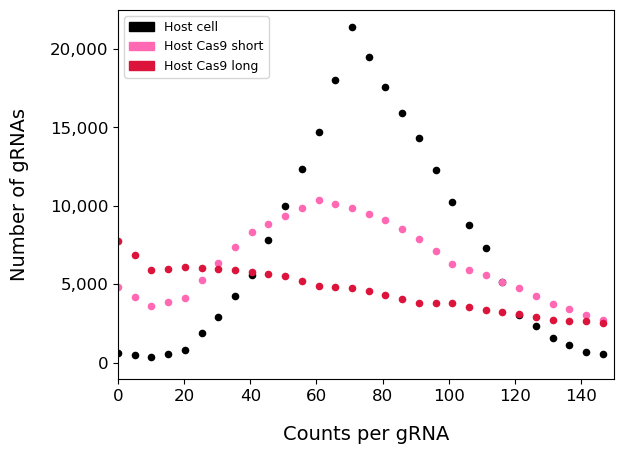

In [55]:
# USING SGRNA FILES analyze growth experimentg 
grna_d16 = pd.read_csv("rra_host_k1_day16.sgrna_summary.txt", sep='\t')
grna_d30 = pd.read_csv("rra_host_k1_day30.sgrna_summary.txt", sep='\t')

grna = pd.merge(grna_d16, grna_d30, on='sgrna', suffixes=('_d16', '_d30'))

x_max_range = 150
# just using this to get histogram coordinates
ax = grna[['control_mean_d16', 'treatment_count_d30', 'treatment_count_d16']].plot(kind='hist', xlim=(0,x_max_range), bins=3200, color=['k', 'hotpink', 'crimson'])
# dont show that plot
plt.close();
# copy histogram data into a dataframe
df = pd.DataFrame([{'x': rect.get_x(), 'y': rect.get_height(), 'c': rect.get_facecolor()} for rect in ax.patches])

import matplotlib.patches as mpatches

f, ax = plt.subplots()
labels = ['Host cell', 'Host Cas9 short', 'Host Cas9 long']
colors = ['k', 'hotpink', 'crimson'] 

legend_handles = []

idxLabel = 0
for i, g in df.groupby('c'):  
    new_data = pd.DataFrame([{'x': (g.x.iloc[ind]+g.x.iloc[ind+1])/2, 'y':(g.y.iloc[ind]+g.y.iloc[ind+1])/2, 'c': i} for ind in range(len(g)-1)])
    nm = pd.concat([new_data, g]).plot(ax=ax, kind='scatter', x='x', y='y', color=colors[idxLabel], xlim=(0,x_max_range), label=labels[idxLabel])

    legend_handles.append(mpatches.Patch(color=colors[idxLabel], label=labels[idxLabel]))
    
    idxLabel += 1

ax.legend(handles=legend_handles, loc="upper left", prop={'size': 9})

formatter = ticker.FuncFormatter(lambda x, p: format(int(x), ','))
plt.gca().xaxis.set_major_formatter(formatter)
plt.gca().yaxis.set_major_formatter(formatter)

ax.set_xlabel("Counts per gRNA", fontsize=14, labelpad=15)
ax.set_ylabel("Number of gRNAs", fontsize=14, labelpad=15)
ax.tick_params(axis='both', which='major', labelsize=12)

plt.savefig("Fig 4d_host_count", facecolor='white', dpi=300, bbox_inches='tight')
plt.show()

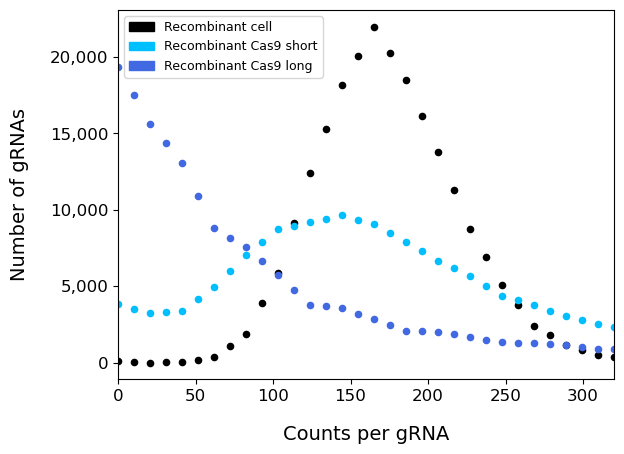

In [53]:
# USING SGRNA FILES analyze growth experimentg 
grna_d16 = pd.read_csv("rra_prod_k1_day16.sgrna_summary.txt", sep='\t')
grna_d30 = pd.read_csv("rra_prod_k1_day30.sgrna_summary.txt", sep='\t')

grna = pd.merge(grna_d16, grna_d30, on='sgrna', suffixes=('_d16', '_d30'))

x_max_range = 320
# just using this to get histogram coordinates
ax = grna[['control_mean_d16', 'treatment_count_d30', 'treatment_count_d16']].plot(kind='hist', xlim=(0,x_max_range), bins=7000, color=['k', 'royalblue', 'deepskyblue'])
# dont show that plot
plt.close()
# copy histogram data into a dataframe
df = pd.DataFrame([{'x': rect.get_x(), 'y': rect.get_height(), 'c': rect.get_facecolor()} for rect in ax.patches])
# make plot
import matplotlib.patches as mpatches

f, ax = plt.subplots()
labels = ['Recombinant cell', 'Recombinant Cas9 short', 'Recombinant Cas9 long']
colors = ['k', 'deepskyblue', 'royalblue']  

legend_handles = []

idxLabel = 0
for i, g in df.groupby('c'):  
    new_data = pd.DataFrame([{'x': (g.x.iloc[ind]+g.x.iloc[ind+1])/2, 'y':(g.y.iloc[ind]+g.y.iloc[ind+1])/2, 'c': i} for ind in range(len(g)-1)])
    nm = pd.concat([new_data, g]).plot(ax=ax, kind='scatter', x='x', y='y', color=colors[idxLabel], xlim=(0,x_max_range), label=labels[idxLabel])

    legend_handles.append(mpatches.Patch(color=colors[idxLabel], label=labels[idxLabel]))
    
    idxLabel += 1

ax.legend(handles=legend_handles, loc="upper left", prop={'size': 9})

formatter = ticker.FuncFormatter(lambda x, p: format(int(x), ','))
plt.gca().xaxis.set_major_formatter(formatter)
plt.gca().yaxis.set_major_formatter(formatter)

ax.set_xlabel("Counts per gRNA", fontsize=14, labelpad=15)
ax.set_ylabel("Number of gRNAs", fontsize=14, labelpad=15)
ax.tick_params(axis='both', which='major', labelsize=12)

plt.savefig("Fig 4g_recombinant", facecolor='white', dpi=300, bbox_inches='tight')
plt.show()